# STAT1000J : US Macroeconomics Analysis
by Philip Tjuatja 524370990065 and Ethan Kahn Firtanto 5243709900

Source of Data: https://www.kaggle.com/datasets/khushikyad001/finance-and-economics-dataset-2000-present

The Finance & Economics Dataset provides daily financial and macroeconomic data, including stock market prices, GDP growth, inflation, interest rates, consumer spending, exchange rates, and more. It is designed for use in:

- ✔ Financial Market Analysis – Track stock index movements and trading volumes.
- ✔ Macroeconomic Research – Study economic trends, including inflation and GDP growth.
- ✔ Investment Decision Making – Evaluate interest rates, corporate profits, and consumer confidence.
- ✔ Machine Learning & Predictive Analytics – Develop forecasting models for economic indicators.

This dataset is valuable for economists, investors, data scientists, researchers, and policymakers.


In [390]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [391]:
original_df = pd.read_csv('finance_economics_dataset.csv')
original_df 

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008-03-14,Dow Jones,1273.76,1235.44,1317.28,1192.34,86910001,8.84,7.00,10.44,...,1.18,113.52,61.98,2385.41,298.72,3033,8.75,35,66.01,2200
2996,2008-03-15,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,...,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261
2997,2008-03-16,S&P 500,1477.52,1448.47,1523.86,1402.69,442387176,4.07,0.88,8.91,...,1.02,81.99,45.64,1943.61,105.81,3894,5.78,4,14.29,12039
2998,2008-03-17,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,...,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979


We only take the following columns to focus more on just the macroeconomic indicators of the US. The following code is done to convert the Date column to datetime and to remove any whitespace. The dataset does not have NaN values.

In [392]:
original_df = pd.read_csv('finance_economics_dataset.csv')
original_df['Date'] = pd.to_datetime(original_df['Date'], errors='coerce')
original_df = original_df.sort_values(by='Date')
df = original_df[['Date', 'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 'Government Debt (Billion USD)', 'Bankruptcy Rate (%)', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 'Consumer Spending (Billion USD)', 'Consumer Confidence Index']].dropna()

df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df


,Date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),Government Debt (Billion USD),Bankruptcy Rate (%),Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Consumer Spending (Billion USD),Consumer Confidence Index
0,2000-01-01,-0.37,6.06,6.10,6.06,27271,2.12,47.20,1052.34,4589,114
1,2000-01-02,3.19,4.95,6.62,2.19,16160,1.40,52.84,1957.73,10101,101
2,2000-01-03,5.54,9.13,2.60,0.82,29962,0.79,78.80,2339.49,13665,92
3,2000-01-04,10.00,3.77,2.20,3.71,12745,4.22,28.18,1308.54,5192,112
4,2000-01-05,1.53,2.20,8.20,4.56,22293,2.21,92.20,2210.08,10688,99
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008-03-14,8.84,7.00,10.44,7.29,10296,8.75,61.98,2385.41,2200,117
2996,2008-03-15,-1.88,9.15,5.61,8.46,16160,5.07,31.61,2147.13,5261,78
2997,2008-03-16,4.07,0.88,8.91,4.80,15186,5.78,45.64,1943.61,12039,85
2998,2008-03-17,1.06,8.61,10.15,7.60,6495,2.35,123.25,2211.40,11979,106


## Queries and Dataset Exploration
1. Pivot Table  
    We create a pivot table to show the distributionn of average values in each year of each of these macroeconomic indicators from 2000 to 2008, for S&P 500.

In [393]:
pivot_df = original_df[original_df['Stock Index'] == 'S&P 500'].copy()
pivot_df['Year'] = pivot_df['Date'].dt.year
pivot_table = pivot_df.pivot_table(index='Year', 
                             values=['Close Price', 'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 
            'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 
            'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
            'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
            'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)'], 
                             aggfunc='mean')
pivot_table


,Bankruptcy Rate (%),Close Price,Consumer Confidence Index,Consumer Spending (Billion USD),Corporate Profits (Billion USD),Crude Oil Price (USD per Barrel),Forex USD/EUR,Forex USD/JPY,GDP Growth (%),Gold Price (USD per Ounce),Government Debt (Billion USD),Inflation Rate (%),Interest Rate (%),Mergers & Acquisitions Deals,Real Estate Index,Retail Sales (Billion USD),Unemployment Rate (%),Venture Capital Funding (Billion USD)
Year,,,,,,,,,,,,,,,,,,
2000,4.811587,2812.044841,84.238095,7182.587302,2584.920635,79.597222,1.151984,116.240476,1.854921,1665.779841,16632.793651,5.550794,5.020714,24.015873,295.935238,4842.325397,8.868651,49.023810
2001,5.046043,2858.864532,84.640288,6978.309353,2670.733813,82.536115,1.119928,115.697338,2.815971,1653.847338,14512.187050,5.243237,5.352734,25.697842,314.071223,5159.798561,8.389496,53.764964
2002,4.323884,2962.525950,84.876033,7605.958678,2744.636364,92.170331,1.152975,117.627769,2.710826,1649.984545,14458.239669,5.369421,4.830992,25.256198,282.968347,5174.776860,8.841405,48.651405
2003,5.205126,3067.176303,84.899160,7863.529412,2613.277311,84.281681,1.123529,113.782857,2.604202,1612.615294,15221.815126,5.206723,5.249244,25.344538,295.137815,4467.722689,8.593361,51.017731
2004,4.401163,3007.606279,82.906977,7245.775194,2334.100775,85.470078,1.115039,117.467752,2.734806,1736.615349,13084.193798,5.318062,4.932016,24.418605,299.108837,5128.682171,8.345039,48.608062
2005,5.035750,3019.291583,84.983333,8148.508333,2695.283333,86.173417,1.123667,116.514667,2.549250,1692.729583,16503.375000,4.883417,5.544083,25.458333,296.720833,5050.116667,8.649833,50.869083
2006,4.756080,2938.418160,83.256000,7551.680000,2486.800000,85.116240,1.137920,114.919360,2.262960,1637.610160,15117.840000,5.480880,5.355200,25.448000,313.808960,5112.520000,8.285520,50.330560
2007,4.994609,2963.654141,85.085938,7577.656250,2410.585938,83.371875,1.149844,114.866328,2.497187,1636.365547,16468.382812,4.818672,5.196172,23.523438,297.324063,5244.250000,8.735156,48.458359
2008,5.461724,3088.645172,87.448276,7086.172414,2267.758621,75.510000,1.149655,115.537586,2.257586,1622.255862,16040.793103,4.491379,5.923103,19.689655,316.082069,5508.862069,8.886897,48.410345


We also queried to search for the times when 

In [394]:
# Use query to find rows with specific conditions

# Filter for inflation rates less than or equal to 1% and select Inflation Rate and CCI
high_inflation = df.query('`Inflation Rate (%)` <= 1')[['Date','Inflation Rate (%)', 'Consumer Confidence Index']].sort_values(by='Consumer Confidence Index', ascending=False)
# Display the result
high_inflation

,Date,Inflation Rate (%),Consumer Confidence Index
2772,2007-08-04,0.04,119
1512,2004-02-21,0.71,119
701,2001-12-02,0.06,119
1377,2003-10-09,0.90,118
2584,2007-01-28,0.87,118
...,...,...,...
1278,2003-07-02,0.98,52
1779,2004-11-14,0.37,52
2197,2006-01-06,0.03,51
1165,2003-03-11,0.93,51


## Visualisations


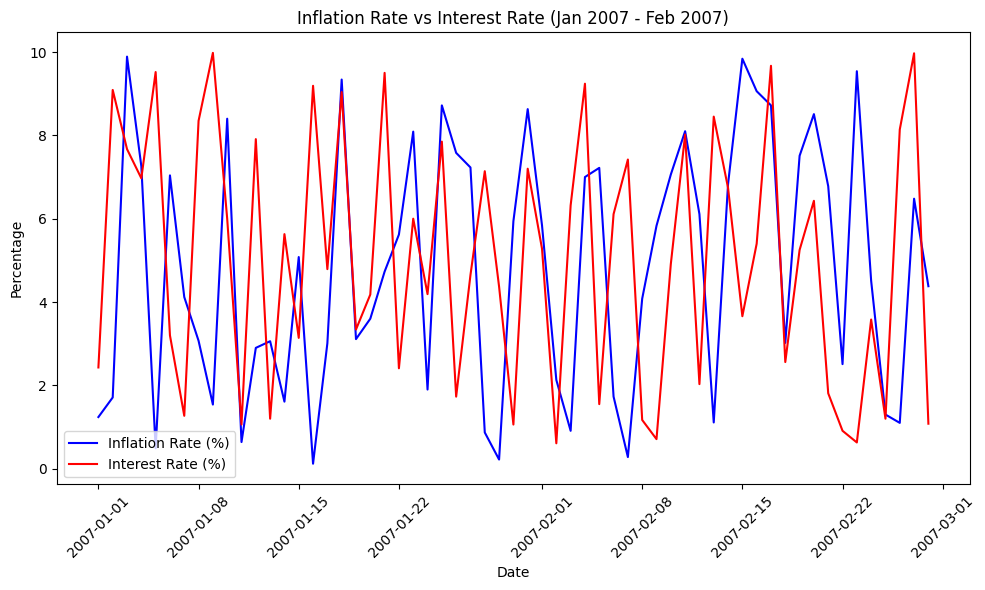

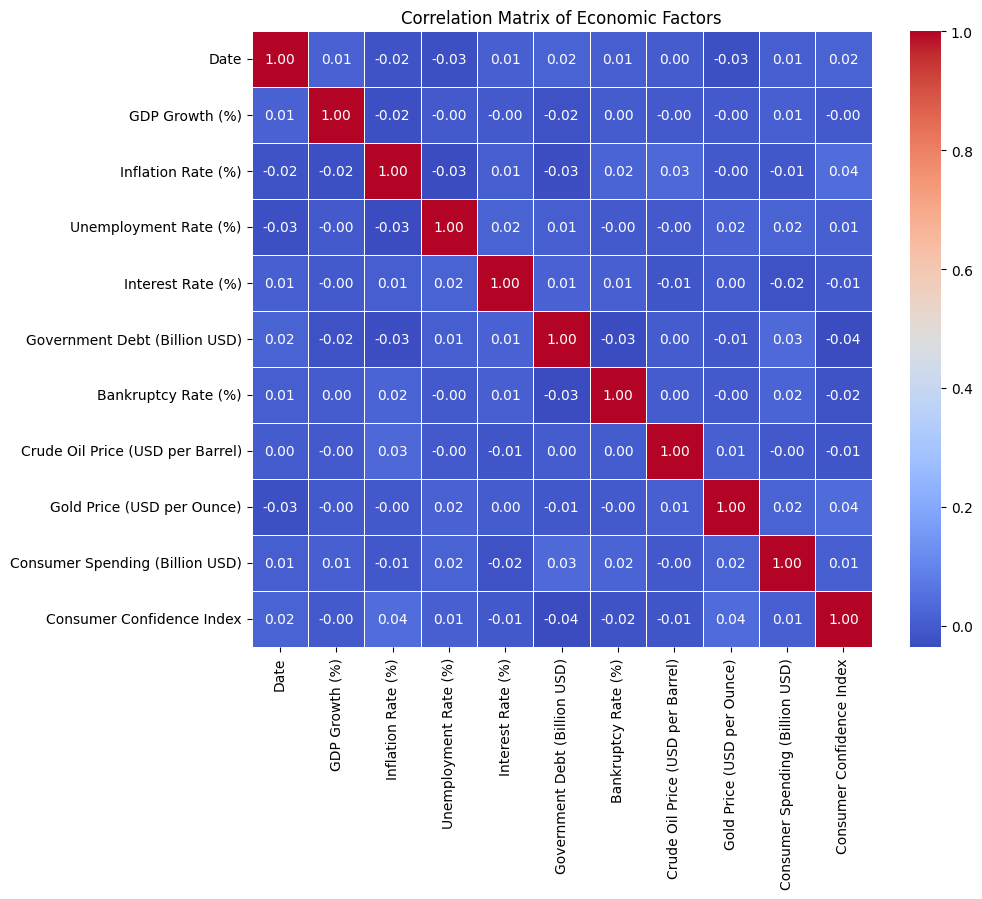

In [395]:

# Assuming your dataframe 'df' contains a 'Date' column
# Convert 'Date' to datetime if it's not already in that format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter data for the period from January 2007 to February 2007
df_filtered = df[(df['Date'].dt.year == 2007) & (df['Date'].dt.month.isin([1, 2]))]

# Sort by Date to ensure the time series is in order
df_filtered = df_filtered.sort_values('Date')

# Plot Inflation Rate and Interest Rate over time (January to February 2007)
plt.figure(figsize=(10, 6))

plt.plot(df_filtered['Date'], df_filtered['Inflation Rate (%)'], label='Inflation Rate (%)', color='blue')
plt.plot(df_filtered['Date'], df_filtered['Interest Rate (%)'], label='Interest Rate (%)', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Inflation Rate vs Interest Rate (Jan 2007 - Feb 2007)')

# Adding a legend
plt.legend()

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Heatmap of correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Economic Factors')
plt.show()

## Hypothesis
Hypothesis: “An increase in interest rates would lead to a decrease in consumer spending."

In [396]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
df = df.sort_values('Date')  # Sort the data by date

# Calculate the change in Interest Rates (Interest Rate tomorrow - Interest Rate today)
df['Interest Rate Change'] = df['Interest Rate (%)'].diff()

# Calculate the change in Consumer Spending (Consumer Spending tomorrow - Consumer Spending today)
df['Consumer Spending Change'] = df['Consumer Spending (Billion USD)'].diff()

# Drop the first row because it will have NaN for the change values
df = df.dropna(subset=['Interest Rate Change', 'Consumer Spending Change'])


X = df['Interest Rate Change']
y = df['Consumer Spending Change']

# Perform Pearson's correlation test
corr, p_value = pearsonr(X, y)

print(f"Pearson Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

# Add constant term for intercept
X_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_const).fit()

# Show the regression summary
print(model.summary())

Pearson Correlation Coefficient: -0.03
P-value: 0.1354
                               OLS Regression Results                               
Dep. Variable:     Consumer Spending Change   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                  0.000
Method:                       Least Squares   F-statistic:                     2.231
Date:                      Sun, 27 Jul 2025   Prob (F-statistic):              0.135
Time:                              06:20:00   Log-Likelihood:                -30292.
No. Observations:                      2999   AIC:                         6.059e+04
Df Residuals:                          2997   BIC:                         6.060e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------

Hypothesis: "High inflation rates would lead to a low Consumer Confidence Index. "

In [397]:

# Assuming df has 'Inflation Rate (%)' and 'CCI' columns
X = df['Inflation Rate (%)']
y = df['Consumer Confidence Index']  # Consumer Confidence Index

# Perform Pearson's correlation test
corr, p_value = pearsonr(X, y)

print(f"Pearson Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

# Define X and y for regression
X_const = sm.add_constant(X)  # Add intercept term (constant)
y = df['Consumer Confidence Index']

# Fit the regression model
model = sm.OLS(y, X_const).fit()

# Show the regression results
print(model.summary())



Pearson Correlation Coefficient: 0.04
P-value: 0.0187
                                OLS Regression Results                               
Dep. Variable:     Consumer Confidence Index   R-squared:                       0.002
Model:                                   OLS   Adj. R-squared:                  0.002
Method:                        Least Squares   F-statistic:                     5.535
Date:                       Sun, 27 Jul 2025   Prob (F-statistic):             0.0187
Time:                               06:20:01   Log-Likelihood:                -13269.
No. Observations:                       2999   AIC:                         2.654e+04
Df Residuals:                           2997   BIC:                         2.655e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]

## Predictive Model


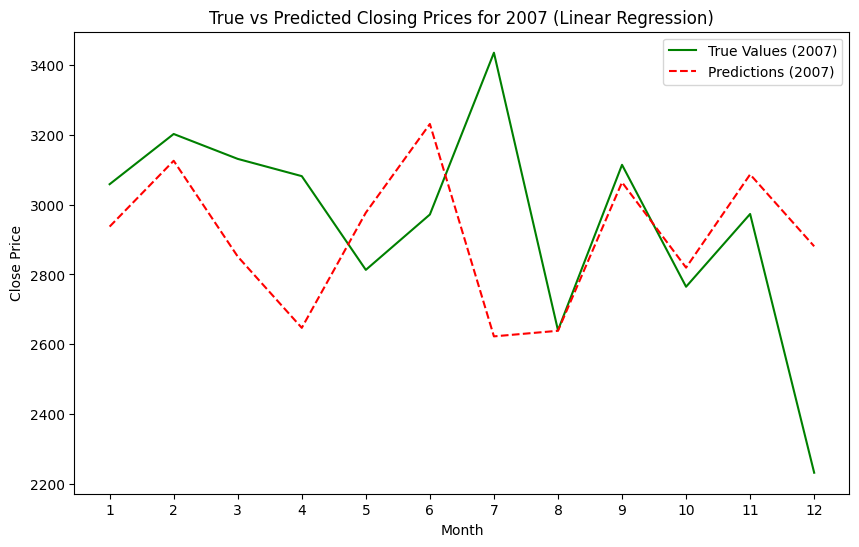

Mean Absolute Error: 251.12262642584082
Mean Squared Error: 123187.2168430306
R-squared: -0.4059782289993281


In [398]:

# Step 1: Load the dataset
df = pd.read_csv('finance_economics_dataset.csv')

# Step 2: Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
df = df[df['Stock Index'] == 'S&P 500']  # Filter for S&P 500
df.set_index('Date', inplace=True)  # Set Date as the index

# Step 3: Filter the dataset for years 2000 to 2006 for training
df_2000_2006 = df[(df.index.year >= 2000) & (df.index.year <= 2006)].copy()

# Step 4: Extract year and month from 'Date' column for aggregation
df_2000_2006['Year'] = df_2000_2006.index.year
df_2000_2006['Month'] = df_2000_2006.index.month

# Step 5: Create a pivot table to get the monthly averages of the features for 2000-2006
monthly_pivot = df_2000_2006.pivot_table(
    index=['Year', 'Month'],
    values=['Close Price', 'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 
            'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 
            'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
            'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
            'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)'],
    aggfunc='mean'
)

# Step 6: Prepare the training dataset (2000-2006) for linear regression
X_train = monthly_pivot.drop(columns=['Close Price'])  # Features
y_train = monthly_pivot['Close Price']  # Target variable (Close Price)

# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Filter the dataset for year 2007 (test set)
test_df = df[df.index.year == 2007].copy()
test_df['Year'] = test_df.index.year
test_df['Month'] = test_df.index.month

# Step 9: Create the pivot table for 2007
test_pivot = test_df.pivot_table(
    index=['Year', 'Month'],
    values=['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 
            'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 
            'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
            'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
            'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)'],
    aggfunc='mean'
)

# Step 10: Make predictions for 2007 using the trained model
X_test = test_pivot  # Features for prediction
y_pred = model.predict(X_test)  # Predictions for the closing prices

# Ensure the true values for 2007 are extracted correctly
# Extract the true values for 2007 and group by 'Year' and 'Month'
true_values_2007 = test_df.groupby(['Year', 'Month'])['Close Price'].mean()

# Reset the index to remove the multi-index and keep only the Month
true_values_2007 = true_values_2007.reset_index(drop=True)

# Convert the index to just the month number (1 for January, 2 for February, etc.)
true_values_2007.index = true_values_2007.index + 1  # Since the index starts from 0, we add 1 to make it 1-based

# Step 2: Visualize the predictions vs actual data
plt.figure(figsize=(10, 6))
plt.plot(true_values_2007.index, true_values_2007, label='True Values (2007)', color='green')
plt.plot(true_values_2007.index, y_pred, label='Predictions (2007)', color='red', linestyle='--')  # Changed to use same index
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.title('True vs Predicted Closing Prices for 2007 (Linear Regression)')
plt.xticks(range(1, 13))  # Ensure all months are shown
plt.legend()
plt.show()
plt.show()



# Step 13: Evaluate the model (if true data for 2007 is available)
mae = mean_absolute_error(true_values_2007, y_pred)
mse = mean_squared_error(true_values_2007, y_pred)
r2 = r2_score(true_values_2007, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


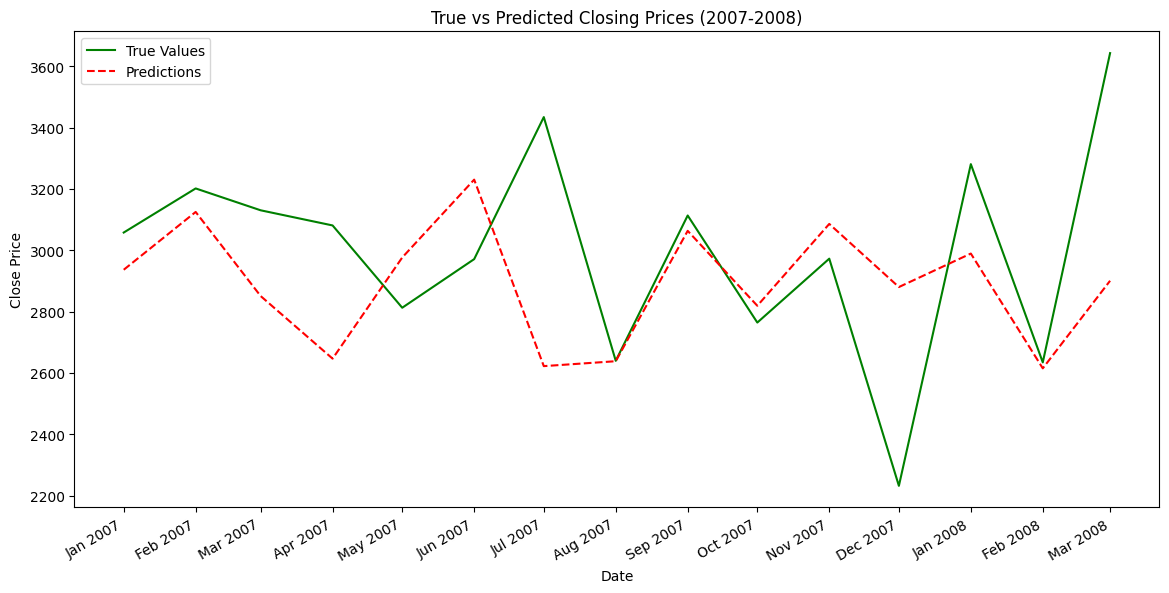

Mean Absolute Error: 271.0864017902187
Mean Squared Error: 140943.87761916232
R-squared: -0.23950149157147105


In [400]:
# Step 8: Filter the dataset for years 2007-2008 (test set)
test_df = df[(df.index.year >= 2007) & (df.index.year <= 2008)].copy()
test_df['Year'] = test_df.index.year
test_df['Month'] = test_df.index.month

# Step 9: Create the pivot table for 2007-2008
test_pivot = test_df.pivot_table(
    index=['Year', 'Month'],
    values=['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 
            'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 
            'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 
            'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 
            'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)'],
    aggfunc='mean'
)

# Step 10: Make predictions for 2007-2008 using the trained model
X_test = test_pivot  # Features for prediction
y_pred = model.predict(X_test)  # Predictions for the closing prices

# Extract the true values for 2007-2008 and group by 'Year' and 'Month'
true_values = test_df.groupby(['Year', 'Month'])['Close Price'].mean()

# Convert the MultiIndex to a readable format for plotting
true_values = true_values.reset_index()
true_values['Date'] = pd.to_datetime(true_values['Year'].astype(str) + '-' + true_values['Month'].astype(str) + '-01')
true_values.set_index('Date', inplace=True)

# Create a date index for predictions (same months as true values)
pred_dates = true_values.index

# Step 2: Visualize the predictions vs actual data
plt.figure(figsize=(14, 7))
plt.plot(true_values.index, true_values['Close Price'], label='True Values', color='green')
plt.plot(pred_dates, y_pred, label='Predictions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('True vs Predicted Closing Prices (2007-2008)')
plt.legend()

# Format x-axis to show months properly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.show()

# Step 13: Evaluate the model for 2007-2008
mae = mean_absolute_error(true_values['Close Price'], y_pred)
mse = mean_squared_error(true_values['Close Price'], y_pred)
r2 = r2_score(true_values['Close Price'], y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')